In [1]:
##loanprediction using python

In [66]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('desktop/data science/python/data/train_loanpreddataset.csv')

In [68]:
df.shape

(614, 13)

In [69]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [70]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [71]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [72]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

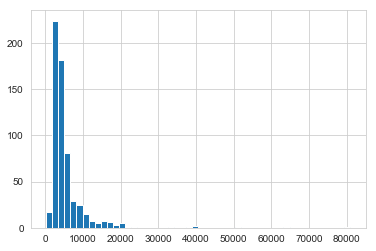

In [73]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50)

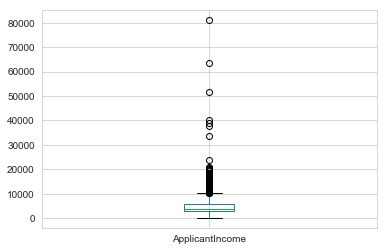

In [74]:
df.boxplot(column ='ApplicantIncome')

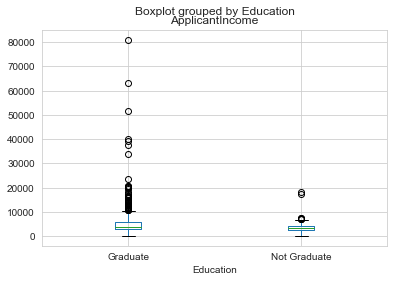

In [75]:
df.boxplot(column='ApplicantIncome',by='Education')

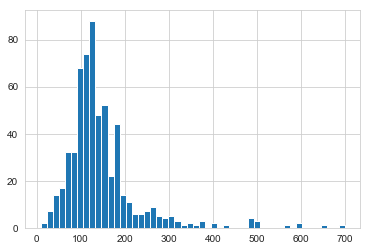

In [76]:
df['LoanAmount'].hist(bins=50)

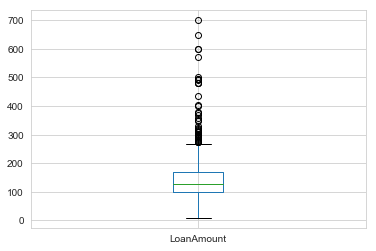

In [77]:
df.boxplot(column='LoanAmount')

In [78]:
temp1=df['Credit_History'].value_counts(ascending=True)
print('frequncy table for credit history')
temp1

frequncy table for credit history


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [79]:
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('probability of getting loan for credit history class')
print(temp2)

probability of getting loan for credit history class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 0, 'Credit_History')

Text(0, 0.5, 'count of applicants')

Text(0.5, 1.0, 'applicant by Credit_History')

Text(0.5, 0, 'Credit_History')

Text(0, 0.5, 'probability of getting loan')

Text(0.5, 1.0, 'probability of getting loan by Credit History')

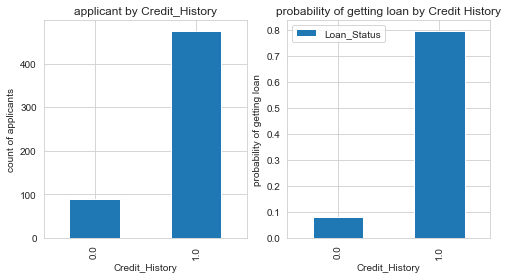

In [80]:
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
temp1.plot.bar(ax=ax1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('count of applicants')
ax1.set_title('applicant by Credit_History')

ax2=fig.add_subplot(1,2,2)
temp2.plot.bar(ax=ax2)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('probability of getting loan')
ax2.set_title('probability of getting loan by Credit History')


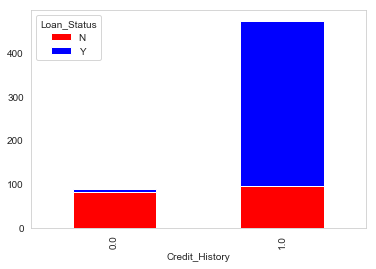

In [81]:
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

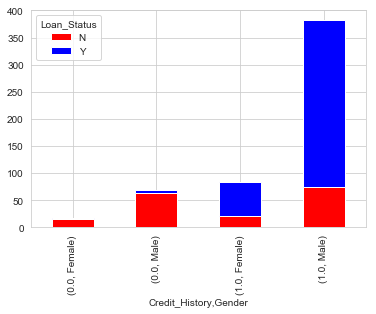

In [82]:
temp3=pd.crosstab([df['Credit_History'],df['Gender']],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=True)

In [83]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
df.head(3)
#df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
#df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


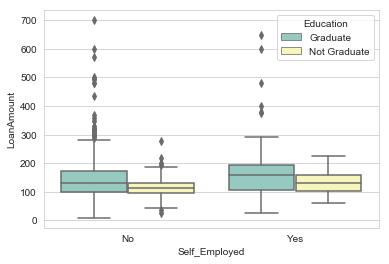

In [85]:
import seaborn as sns
sns.set_style("whitegrid")
ax=sns.boxplot(x="Self_Employed",y="LoanAmount",hue="Education",data=df,palette="Set3")

In [86]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [87]:
print(df[df["Self_Employed"].isnull()])#[null_columns])

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
11   LP001027    Male     Yes          2      Graduate           NaN   
19   LP001041    Male     Yes          0      Graduate           NaN   
24   LP001052    Male     Yes          1      Graduate           NaN   
29   LP001087  Female      No          2      Graduate           NaN   
30   LP001091    Male     Yes          1      Graduate           NaN   
95   LP001326    Male      No          0      Graduate           NaN   
107  LP001370    Male      No          0  Not Graduate           NaN   
111  LP001387  Female     Yes          0      Graduate           NaN   
114  LP001398    Male      No          0      Graduate           NaN   
158  LP001546    Male      No          0      Graduate           NaN   
170  LP001581    Male     Yes          0  Not Graduate           NaN   
218  LP001732    Male     Yes          2      Graduate           NaN   
231  LP001768    Male     Yes          0      Graduate          

In [88]:
df["Self_Employed"].fillna('No',inplace=True)

In [89]:
df.iloc[11]

Loan_ID              LP001027
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed              No
ApplicantIncome          2500
CoapplicantIncome        1840
LoanAmount                109
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 11, dtype: object

In [90]:
table=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [91]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


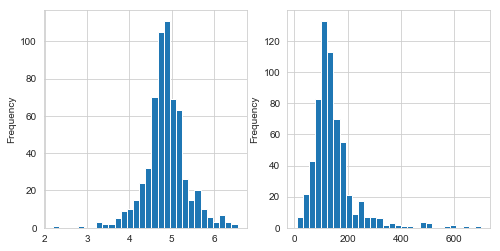

In [92]:
df['loanamount_log']=np.log(df['LoanAmount'])
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
df['loanamount_log'].plot.hist(ax=ax1,bins=30)

ax2=fig.add_subplot(1,2,2)
df['LoanAmount'].plot.hist(ax=ax2,bins=30)


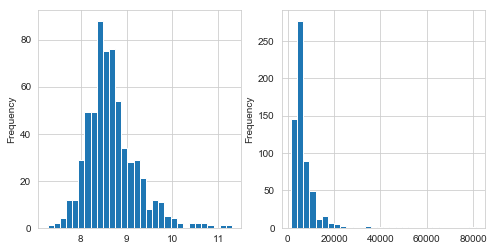

In [93]:
df['Totalincome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['totalincome_log']=np.log(df['Totalincome'])
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
df['totalincome_log'].plot.hist(ax=ax1,bins=30)

ax2=fig.add_subplot(1,2,2)
df['Totalincome'].plot.hist(ax=ax2,bins=30)


In [94]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [95]:
df['Gender'].fillna('Male',inplace=True)

In [96]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [97]:
df['Married'].fillna('Yes',inplace=True)

In [98]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [99]:
df['Dependents'].fillna('0',inplace=True)

In [100]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [101]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [102]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [103]:
df['Credit_History'].fillna(1,inplace=True)

In [104]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
Totalincome          0
totalincome_log      0
dtype: int64

In [105]:
df.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
loanamount_log       float64
Totalincome          float64
totalincome_log      float64
dtype: object

In [106]:
from sklearn.preprocessing import LabelEncoder
cat_var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in cat_var:
    df[i]=le.fit_transform(df[i])
df.dtypes    

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
loanamount_log       float64
Totalincome          float64
totalincome_log      float64
dtype: object

In [107]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
import sklearn

def Classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy:%s"%"{0:.3%}".format(accuracy))
    kf=KFold(n_splits=5)
    accurate=[]
    for train,test in kf.split(data):
        train_predictor=(data[predictors].iloc[train,:])
        train_target=data[outcome].iloc[train]
        model.fit(train_predictor,train_target)
        accurate.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    print("cross.validation score :%s"%"{0:.3%}".format(np.mean(accurate)))
    model.fit(data[predictors],data[outcome])

In [108]:
import random 
random.seed(1)
model=DecisionTreeClassifier()
outcome_var='Loan_Status'
predictor_var=['Credit_History','Education','Married','Self_Employed','Property_Area']
Classification_model(model,df,predictor_var,outcome_var)

Accuracy:80.945%
cross.validation score :78.179%


In [109]:
predictor_var = ['Credit_History','Gender','Married','Education']
Classification_model(model, df,predictor_var,outcome_var)

Accuracy:80.945%
cross.validation score :80.946%


In [110]:
model = LogisticRegression()
predictor_var = ['Credit_History']
Classification_model(model, df,predictor_var,outcome_var)

Accuracy:80.945%
cross.validation score :80.946%


/Users/jyotikhetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotikhetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotikhetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotikhetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotikhetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [131]:
df_test = pd.read_csv("desktop/data science/python/data/test_LoanPredDataset.csv") 

df_test['Self_Employed'].fillna('No',inplace=True)
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), 
                        inplace=True)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])
df_test['Gender'].fillna('Male',inplace=True)
df_test['Married'].fillna('Yes',inplace=True)
df_test['Dependents'].fillna('0',inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean()
                              ,inplace=True)
df_test['Credit_History'].fillna(1.0,inplace=True)
var_mod = ['Gender','Married','Dependents','Education',
           'Self_Employed','Property_Area', 'Loan_Status']
#df_test.Loan_Status
#df_test.Loan_ID
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])
df_test.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [132]:
model = LogisticRegression()
predictor_var = ['Credit_History']
model.fit(df[predictor_var],df[outcome_var])
predictions = model.predict(df_test[predictor_var])
predictions
df_test.shape

/Users/jyotikhetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

(367, 16)

In [156]:
df_output['Loan_ID'] = df_test['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(predictions)
df_output[['Loan_ID','Loan_Status']]

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y
